# DataScience Hackathon

## NETWORK ANAMOLY DETECTION  

##### BUSINESS PROBLEM:

Your task to build network intrusion detection system to detect anomalies and attacks in the
Network. There are two problems.
1. Binomial Classification: Activity is normal or attack
2. Multinomial classification: Activity is normal or DOS or PROBE or R2L or U2R
Please note that, currently the dependent variable (target variable) is not defined explicitly.
However, you can use attack variable to define the target variable as required.

###### DATA AVAILABILITY:
This data is KDDCUP’99 data set, which is widely used as one of the few publicly available data sets
for network-based anomaly detection systems.


### Solution

This business problem is modeled as binomial classification.

Binomial Classification: Activity is normal or attack

Algorithms - Logistic Regression,Random Forest used in developing the model

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('C:\\Users\\slakkoju\\TM\\train.txt',header=None)
test_df  = pd.read_csv('C:\\Users\\slakkoju\\TM\\test.txt',header=None)

In [3]:
# make copy of the datasets

train = train_df.copy()
test  = test_df.copy()

### Exploratatory Data Analysis

In [4]:
# Display the dimensions of the data sets

print("train data set dimensions:",train.shape)
print("test data set dimensions:",test.shape)

train data set dimensions: (125973, 43)
test data set dimensions: (22544, 43)


In [5]:
# Display the header of the train data set

train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
# Display the header of the test data set

test.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [7]:
column_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent",
"hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
"count","srv_count","serror_rate", "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate", "srv_diff_host_rate",
"dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
"attack", "last_flag"]

In [8]:
# setting the column names to data sets

train.columns = column_names
test.columns  = column_names

In [9]:
# Display the information of the TRAIN data set

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [10]:
# Display the information of the TEST data set

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
duration                       22544 non-null int64
protocol_type                  22544 non-null object
service                        22544 non-null object
flag                           22544 non-null object
src_bytes                      22544 non-null int64
dst_bytes                      22544 non-null int64
land                           22544 non-null int64
wrong_fragment                 22544 non-null int64
urgent                         22544 non-null int64
hot                            22544 non-null int64
num_failed_logins              22544 non-null int64
logged_in                      22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_root                       22544 non-null int64
num_file_creations             22544 non-null int64
num_

In [11]:
# Display the header of the train data set

train.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune,20
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal,21


In [12]:
# Display the header of the TEST data set

test.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21
22543,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,mscan,14


In [13]:
# list the data types for each column
print(train.dtypes)

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [14]:
# [TRAIN DATA SET] seperate out the Categorical and Numerical features

numerical_feature   = train.dtypes[train.dtypes!= 'object'].index
categorical_feature = train.dtypes[train.dtypes== 'object'].index

print ("There are {} numeric and {} categorical columns in train data"
       .format(numerical_feature.shape[0],categorical_feature.shape[0]))

There are 39 numeric and 4 categorical columns in train data


In [15]:
numerical_feature

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'last_flag'],
      dtype='object')

In [16]:
categorical_feature

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

####  correlation between variables

In [17]:
train.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,...,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,-0.156311
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,...,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,-0.157130
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,...,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,-0.160013
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178
logged_in,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.624365,0.604058,-0.256065,-0.160994,-0.055953,-0.491478,-0.493264,-0.275972,-0.272806,0.269818
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002014,0.019085,0.014413,1.000000,...,-0.010321,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.006101


In [18]:
# [TRAIN DATA SET] Verifying the Target
train.attack.value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [19]:
d ={'normal':['normal'],
'dos':['neptune','smurf','back','teardrop','pod','land','apache2','udpstorm','processtable','worm'],
'probe':['satan','ipsweep','portsweep','nmap','mscan','saint'],
'r2l':['guess_passwd','ftp_write','imap','phf','multihop','warezmaster','warezclient','spy','xlock','xsnoop','snmpguess','snmpgetattak','httptunnel','sendmail','named'],
'u2r':['buffer_overflow','rootkit','loadmodule','perl','sqlattack','xterm','ps']}

In [20]:
d1 = {k: oldk for oldk, oldv in d.items() for k in oldv}
print (d1)

{'named': 'r2l', 'pod': 'dos', 'satan': 'probe', 'warezmaster': 'r2l', 'warezclient': 'r2l', 'snmpguess': 'r2l', 'apache2': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'processtable': 'dos', 'back': 'dos', 'httptunnel': 'r2l', 'sendmail': 'r2l', 'nmap': 'probe', 'portsweep': 'probe', 'loadmodule': 'u2r', 'phf': 'r2l', 'sqlattack': 'u2r', 'ftp_write': 'r2l', 'xterm': 'u2r', 'rootkit': 'u2r', 'saint': 'probe', 'land': 'dos', 'snmpgetattak': 'r2l', 'mscan': 'probe', 'ps': 'u2r', 'xsnoop': 'r2l', 'perl': 'u2r', 'ipsweep': 'probe', 'buffer_overflow': 'u2r', 'worm': 'dos', 'multihop': 'r2l', 'normal': 'normal', 'imap': 'r2l', 'xlock': 'r2l', 'neptune': 'dos', 'smurf': 'dos', 'guess_passwd': 'r2l', 'udpstorm': 'dos'}


In [21]:
# [TRAINING DATA SET] Target Label - attack value converted to 5 level values

train['attack'] = train['attack'].map(d1)

In [22]:
# [TEST DATA SET] Target Label - attack value converted to 5 level values

test['attack'] = test['attack'].map(d1)

In [23]:
train['attack'].value_counts()

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack, dtype: int64

In [24]:
test['attack'].value_counts()

normal    9711
dos       7167
r2l       2707
probe     2421
u2r         67
Name: attack, dtype: int64

In [25]:
# converting the TARGET to binomial problem
train['attack']=train['attack'].apply(lambda x: 'normal' if x=='normal' else 'attack')

In [26]:
train.attack.value_counts()

normal    67343
attack    58630
Name: attack, dtype: int64

In [27]:
train['attack']=train['attack'].apply(lambda x: 0 if x=='normal' else 1)

In [28]:
train.attack.value_counts()

0    67343
1    58630
Name: attack, dtype: int64

In [29]:
train.describe(include=['object'])

,protocol_type,service,flag
count,125973,125973,125973
unique,3,70,11
top,tcp,http,SF
freq,102689,40338,74945


### BASIC FEATURES  - Exploration

##### Continuous Features

duration
src_bytes                    
dst_bytes                    
land                       
wrong_fragment       
urgent


##### Categorical Features

protocol_type
service    
flag                   



In [30]:
train[["duration","src_bytes","dst_bytes","land","wrong_fragment","urgent"]].describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000


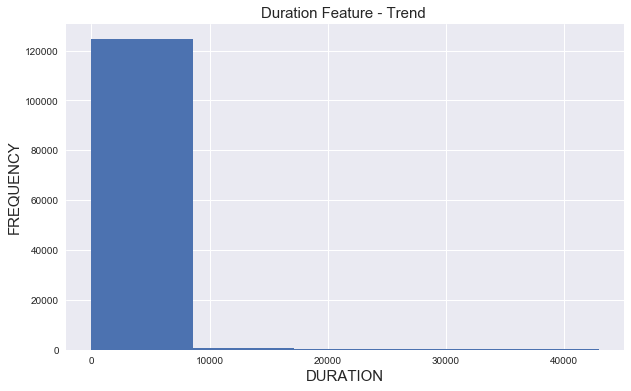

In [31]:
# DURATION feature - visualization

plt.figure(figsize=(10,6))
plt.hist(train.duration, bins=5)
plt.title('Duration Feature - Trend ', size=15)
plt.xlabel('DURATION', size=15)
plt.ylabel('FREQUENCY', size=15)

In [32]:
bins = np.linspace(min(train["duration"]), max(train["duration"]), 4)
bins

array([     0.        ,  14302.66666667,  28605.33333333,  42908.        ])

In [33]:
duration_group_names = ['Low', 'Medium', 'High']

In [34]:
train['duration-binned'] = pd.cut(train['duration'], bins, labels=duration_group_names, include_lowest=True )
train[['duration','duration-binned']].head()

,duration,duration-binned
0,0,Low
1,0,Low
2,0,Low
3,0,Low
4,0,Low


In [35]:
train['duration-binned'].value_counts()

Low       125131
Medium       432
High         410
Name: duration-binned, dtype: int64

In [36]:
per = (125131/len(train['duration']))
per

0.9933160280377541

### Remark  - 99% Data with duration = 0 

### Examining the correlation coefficient & P-value of the Features

In [37]:
from scipy import stats

In [38]:
# BASIC FEATURES OF EACH NETWORK CONNECTION VECTOR

basic_features=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent"]
basic_features_continuous=["duration","src_bytes","dst_bytes","land","wrong_fragment","urgent"]
basic_features_categorial=["protocol_type","service","flag"]

# CONTENT RELATED FEATURES OF EACH NETWORK CONNECTION VECTOR

content_features=["hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login"]

# TIME RELATED TRAFFIC FEATURES OF EACH NETWORK CONNECTION VECTOR

time_features=["count","srv_count","serror_rate", "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate", "srv_diff_host_rate"]

# HOST BASED TRAFFIC FEATURES IN A NETWORK CONNECTION VECTOR

host_features=["dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]


#### Examining the correlation coefficient & P-value of the Basic continuous Features

In [39]:
basic_features=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent"]
basic_features_continuous=["duration","src_bytes","dst_bytes","land","wrong_fragment","urgent"]
basic_features_categorial=["protocol_type","service","flag"]

In [40]:
for i in basic_features_continuous:
    pearson_coef, p_value = stats.pearsonr(train[i], train['attack'])
    print("Featue:",i,",Pearson Coefficient is", pearson_coef, " P-value is =", p_value) 

Featue: duration ,Pearson Coefficient is 0.0487853274231  P-value is = 3.0278501987e-67
Featue: src_bytes ,Pearson Coefficient is 0.00592132275611  P-value is = 0.0355853993339
Featue: dst_bytes ,Pearson Coefficient is 0.00411753502929  P-value is = 0.14390157813
Featue: land ,Pearson Coefficient is 0.00719075899481  P-value is = 0.0107044925899
Featue: wrong_fragment ,Pearson Coefficient is 0.0959054806994  P-value is = 4.02447459244e-255
Featue: urgent ,Pearson Coefficient is -0.00278703240336  P-value is = 0.322572896831


### Conclusion:

##### Duration Vs Attack

Since the p-value[3.027850198700825e-67] is <0.001, the correlation between DURATION and ATTACK is strongly significant, and 
the linear relationship [Coefficient is 0.048785327423118606] is quite low (~0.048, close to 0)


##### Src_bytes Vs Attack

Since the p-value [0.03558539933393051]is <0.05, the correlation between SRC_BYTES and ATTACK is moderately significant, and 
the linear relationship [0.005921] is quite low (~0.005, close to 0)

##### Dst_bytes Vs Attack

Since the p-value [0.14390157813044968]is >0.1, NO correlation between DST_BYTES and ATTACK , and 
the linear relationship [0.0041175] is quite low (~0.005, close to 0)

##### Land Vs Attack

Since the p-value [0.010704492589924277]is <0.05, the correlation between LAND and ATTACK is moderately significant , and 
the linear relationship [0.007190758] is quite low (~0.005, close to 0)

##### Wrong_Fragment Vs Attack

Since the p-value [4.024474592]is > 0.1, NO correlation between WRONG and ATTACK  , and 
the linear relationship [0.007190758] is quite low (~0.005, close to 0)

##### Urgent Vs Attack

Since the p-value [0.3225728968312942]is >0.1, NO correlation between LAND and ATTACK is moderately significant , and 
the linear relationship [0.007190758] is quite low (~0.005, close to 0)

#### Significant Features set from Basic Features.

Duration

Src_bytes

Land

#### Examining the correlation coefficient & P-value of Network Connection Feature Vector

In [41]:
# CONTENT RELATED FEATURES OF EACH NETWORK CONNECTION VECTOR

content_features=["hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
                  "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
                  "is_host_login","is_guest_login"]

In [42]:
train[["hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
                  "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
                  "is_host_login","is_guest_login"]].describe()

,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000
mean,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423
std,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000


In [43]:
for i in content_features:
    pearson_coef, p_value = stats.pearsonr(train[i], train['attack'])
    print("Featue:",i,",Pearson Coefficient is", pearson_coef, " P-value is =", p_value) 

Featue: hot ,Pearson Coefficient is -0.0130834143094  P-value is = 3.42048071508e-06
Featue: num_failed_logins ,Pearson Coefficient is -0.00375507392408  P-value is = 0.182608058893
Featue: logged_in ,Pearson Coefficient is -0.69017073958  P-value is = 0.0
Featue: num_compromised ,Pearson Coefficient is -0.0101983275757  P-value is = 0.000294924827692
Featue: root_shell ,Pearson Coefficient is -0.0202854019527  P-value is = 5.99916108747e-13
Featue: su_attempted ,Pearson Coefficient is -0.0224484966462  P-value is = 1.60615748956e-15
Featue: num_root ,Pearson Coefficient is -0.0114524913371  P-value is = 4.80554253925e-05
Featue: num_file_creations ,Pearson Coefficient is -0.0212707294491  P-value is = 4.34156215433e-14
Featue: num_shells ,Pearson Coefficient is -0.00947199735696  P-value is = 0.00077406100577
Featue: num_access_files ,Pearson Coefficient is -0.0367005058866  P-value is = 8.23357483573e-39
Featue: num_outbound_cmds ,Pearson Coefficient is nan  P-value is = 1.0
Featue: 

C:\Users\slakkoju\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\slakkoju\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


### Conclusion:


#### Significant Features set from Content Features.

hot

num_compromised

root_shell

su_attempted

num_root

num_file_creations

num_shells

num_access_files

is_guest_login


#### Examining the correlation coefficient & P-value of TRAFFIC Connection Feature Vector

In [44]:
# TIME RELATED TRAFFIC FEATURES OF EACH NETWORK CONNECTION VECTOR

time_features=["count","srv_count","serror_rate", "srv_serror_rate","rerror_rate",
               "srv_rerror_rate","same_srv_rate","diff_srv_rate", "srv_diff_host_rate"]


In [45]:
train[["count","srv_count","serror_rate", "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate", "srv_diff_host_rate"]].describe()

,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322
std,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000
50%,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000
max,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
for i in time_features:
    pearson_coef, p_value = stats.pearsonr(train[i], train['attack'])
    print("Featue:",i,",Pearson Coefficient is", pearson_coef, " P-value is =", p_value) 

Featue: count ,Pearson Coefficient is 0.576444265324  P-value is = 0.0
Featue: srv_count ,Pearson Coefficient is 0.00077071233139  P-value is = 0.784435265359
Featue: serror_rate ,Pearson Coefficient is 0.650652240227  P-value is = 0.0
Featue: srv_serror_rate ,Pearson Coefficient is 0.648288831566  P-value is = 0.0
Featue: rerror_rate ,Pearson Coefficient is 0.253397111026  P-value is = 0.0
Featue: srv_rerror_rate ,Pearson Coefficient is 0.253503962144  P-value is = 0.0
Featue: same_srv_rate ,Pearson Coefficient is -0.751913436876  P-value is = 0.0
Featue: diff_srv_rate ,Pearson Coefficient is 0.203659964659  P-value is = 0.0
Featue: srv_diff_host_rate ,Pearson Coefficient is -0.119377182436  P-value is = 0.0


### Conclusion:

#### Significant Features set from Content Features.

no evidence that the correlation is significant.



#### Examining the correlation coefficient & P-value of HOST based TRAFFIC Connection Feature Vector

In [47]:
# HOST BASED TRAFFIC FEATURES IN A NETWORK CONNECTION VECTOR

host_features=["dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]


In [48]:
train[["dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]].describe()

,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
for i in host_features:
    pearson_coef, p_value = stats.pearsonr(train[i], train['attack'])
    print("Featue:",i,",Pearson Coefficient is", pearson_coef, " P-value is =", p_value) 

Featue: dst_host_count ,Pearson Coefficient is 0.375052092401  P-value is = 0.0
Featue: dst_host_srv_count ,Pearson Coefficient is -0.722535370539  P-value is = 0.0
Featue: dst_host_same_srv_rate ,Pearson Coefficient is -0.693802832832  P-value is = 0.0
Featue: dst_host_diff_srv_rate ,Pearson Coefficient is 0.242897958535  P-value is = 0.0
Featue: dst_host_same_src_port_rate ,Pearson Coefficient is 0.0924444308929  P-value is = 4.09435769889e-237
Featue: dst_host_srv_diff_host_rate ,Pearson Coefficient is 0.0623323382679  P-value is = 1.17263686481e-108
Featue: dst_host_serror_rate ,Pearson Coefficient is 0.651841616716  P-value is = 0.0
Featue: dst_host_srv_serror_rate ,Pearson Coefficient is 0.654985445223  P-value is = 0.0
Featue: dst_host_rerror_rate ,Pearson Coefficient is 0.252562724751  P-value is = 0.0
Featue: dst_host_srv_rerror_rate ,Pearson Coefficient is 0.253430150385  P-value is = 0.0


### Conclusion:

#### Significant Features set from Content Features.

dst_host_same_srv_rate

dst_host_same_src_port_rate 

dst_host_srv_diff_host_rate 



In [50]:
## The Feature set to build the model

Feature_to_use=['dst_host_same_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','hot',
                'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
                'num_shells','num_access_files','is_guest_login','duration','src_bytes','dst_bytes','land',
                'protocol_type','service','flag']

In [51]:
Feature_to_use

['dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'hot',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_guest_login',
 'duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'protocol_type',
 'service',
 'flag']

In [52]:
train = train[['dst_host_same_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','hot',
               'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
               'num_shells','num_access_files','is_guest_login','duration','src_bytes','dst_bytes','land',
               'protocol_type','service','flag','attack']]

In [53]:
test = test[['dst_host_same_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','hot',
             'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
             'num_shells','num_access_files','is_guest_login','duration','src_bytes','dst_bytes','land',
             'protocol_type','service','flag']]

In [54]:
train.shape

(125973, 20)

In [55]:
test.shape

(22544, 19)

In [56]:
# [TRAIN DataSet] Missing values - checking

train.isnull().sum().sort_values(ascending=False)

attack                         0
flag                           0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
hot                            0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_guest_login                 0
duration                       0
src_bytes                      0
dst_bytes                      0
land                           0
protocol_type                  0
service                        0
dst_host_same_srv_rate         0
dtype: int64

In [57]:
# [TEST DataSet] Missing values - checking

test.isnull().sum().sort_values(ascending=False)

flag                           0
num_file_creations             0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
hot                            0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_shells                     0
service                        0
num_access_files               0
is_guest_login                 0
duration                       0
src_bytes                      0
dst_bytes                      0
land                           0
protocol_type                  0
dst_host_same_srv_rate         0
dtype: int64

In [58]:
#Feature engineering

#Src_bytes
#Dst_bytes

# new feature - total_bytes

#[TRAIN DataSet]
train['total_bytes'] = train['src_bytes']+train['dst_bytes']

# [TEST DataSet]
test['total_bytes'] = test['src_bytes']+test['dst_bytes']

In [59]:
train.drop(['src_bytes','dst_bytes'],axis=1,inplace=True)
test.drop(['src_bytes','dst_bytes'],axis=1,inplace=True)

In [60]:
train.shape

(125973, 19)

In [61]:
test.shape

(22544, 18)

In [62]:
# [Training DATA set ] One-Hot encoding of categorical features
train = pd.get_dummies(train)

In [63]:
# [Test DATA set ] One-Hot encoding of categorical features
test = pd.get_dummies(test)

In [64]:
# [TRAIN DataSet ] - dimensions after encoding
train.shape

(125973, 100)

In [65]:
# [TEST DataSet ] - dimensions after encoding
test.shape

(22544, 93)

#### Observation - after one Hot encoding

Features are not same between TRAIN and TEST data set after one hot encoding

These features are not found in TEST Data Set

service_aol 

service_harvest

service_http_2784

service_http_8001

service_red_i 

service_urh_i


In [66]:
# Droping these features from TRAIN Set to make it same as TEST Set features

train_cols_to_drop = ['service_aol', 'service_harvest','service_http_2784','service_http_8001','service_red_i','service_urh_i']
train.drop(['service_aol', 'service_harvest','service_http_2784','service_http_8001','service_red_i','service_urh_i'],axis=1,inplace=True)

In [67]:
train.shape

(125973, 94)

In [68]:
test.shape

(22544, 93)

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 94 columns):
dst_host_same_srv_rate         125973 non-null float64
dst_host_same_src_port_rate    125973 non-null float64
dst_host_srv_diff_host_rate    125973 non-null float64
hot                            125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 non-null int64
num_shells                     125973 non-null int64
num_access_files               125973 non-null int64
is_guest_login                 125973 non-null int64
duration                       125973 non-null int64
land                           125973 non-null int64
attack                         125973 non-null int64
total_bytes                    125973 non-null int64
protocol_type_icmp             1259

In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 93 columns):
dst_host_same_srv_rate         22544 non-null float64
dst_host_same_src_port_rate    22544 non-null float64
dst_host_srv_diff_host_rate    22544 non-null float64
hot                            22544 non-null int64
num_compromised                22544 non-null int64
root_shell                     22544 non-null int64
su_attempted                   22544 non-null int64
num_root                       22544 non-null int64
num_file_creations             22544 non-null int64
num_shells                     22544 non-null int64
num_access_files               22544 non-null int64
is_guest_login                 22544 non-null int64
duration                       22544 non-null int64
land                           22544 non-null int64
total_bytes                    22544 non-null int64
protocol_type_icmp             22544 non-null uint8
protocol_type_tcp              22544 non-null uint8
p

### Numerical Features - normalization

In [71]:
# Numeric features from feature_to_use to build the model after correlation examination
numeric=['total_bytes','dst_host_same_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','hot',
         'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
         'num_shells','num_access_files','is_guest_login','duration','total_bytes','land']

In [72]:
#[TRAIN and TEST Dataset] Normalizing Numerical Features 


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


train[numeric]=scaler.fit_transform(train[numeric])
test[numeric] = scaler.fit_transform(test[numeric])

In [73]:
# Split the data into features and target label
target   = train['attack']
features = train.drop(['attack'],axis = 1)


In [74]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.20, 
                                                    random_state = 12345)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 100778 samples.
Testing set has 25195 samples.


#### Model Building 

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

### Logistic Regression

In [76]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Logistic Regression - Predictions and Evaluations

In [77]:
predictions = LR.predict(X_test)

##### Create a classification report for the model.

In [78]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97     13408
          1       0.97      0.96      0.96     11787

avg / total       0.96      0.96      0.96     25195



In [79]:
print(confusion_matrix(y_test,predictions))

[[13023   385]
 [  506 11281]]


## HyperParameter tuning

In [80]:
# penalty - l1 regularization

LR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
predictions = LR.predict(X_test)

In [82]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97     13408
          1       0.97      0.96      0.96     11787

avg / total       0.96      0.96      0.96     25195



In [83]:
print(confusion_matrix(y_test,predictions))

[[13018   390]
 [  509 11278]]


In [84]:
# predict probabilities
probs = LR.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

In [85]:
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.994


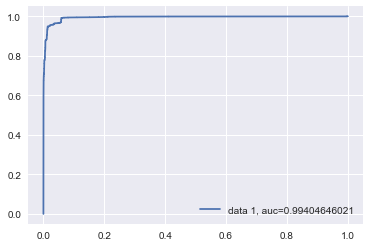

In [86]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
#plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
#plt.plot(fpr, tpr, marker='.')
plt.plot(fpr, tpr,label="data 1, auc="+str(auc))
# show the plot
#plt.show()

plt.legend(loc=0)

### RANDOM FOREST 

In [87]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_predictions = rf.predict(X_test)

print(classification_report(y_test,rf_predictions))
print(confusion_matrix(y_test,rf_predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     13408
          1       1.00      1.00      1.00     11787

avg / total       1.00      1.00      1.00     25195

[[13393    15]
 [   23 11764]]


AUC: 1.000


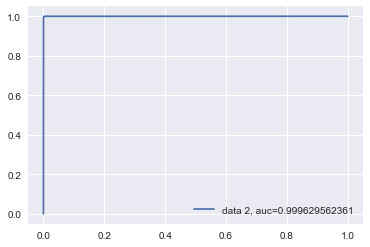

In [88]:
# predict probabilities
rf_probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, rf_probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, rf_probs)
# plot no skill
#plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr1,tpr1,label="data 2, auc="+str(auc))
# show the plot
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()

plt.legend(loc=0)

# TEST DATA SET - TARGET [attack - variable to predict]

In [89]:
#[TEST DATA] - prediction using logistic regression
test['attack']=LR.predict(test)

In [90]:
# [TEST DATA SET] file preparation after predicting target - Lable - "attack"
#test.to_csv('test_ds_generation.csv')